In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from robot_tools import *
import math

In [2]:
def mat_map(mat):
    if mat.shape == (4,4):
        r11, r12, r13, X = [float(PA[0, i]) for i in range(4)]
        r21, r22, r23, Y = [float(PA[1, j]) for j in range(4)]
        r31, r32, r33, Z = [float(PA[2, k]) for k in range(4)]
        
        mat_dict = {
            'r11': r11, 'r12': r12, 'r13': r13, 'X': X,
            'r21': r21, 'r22': r22, 'r23': r23, 'Y': Y,
            'r31': r31, 'r32': r32, 'r33': r33, 'Z': Z
        }
        
    else:
        print('Matrix shape is wrong')
        
        
        
    return mat_dict


### Tut 6.3.1 (Cubic)

Displacement Equations for theta_1


-0.001*pi*t**3 + 0.015*pi*t**2

Displacement Equations for theta_2


0

Displacement Equations for theta_3


0

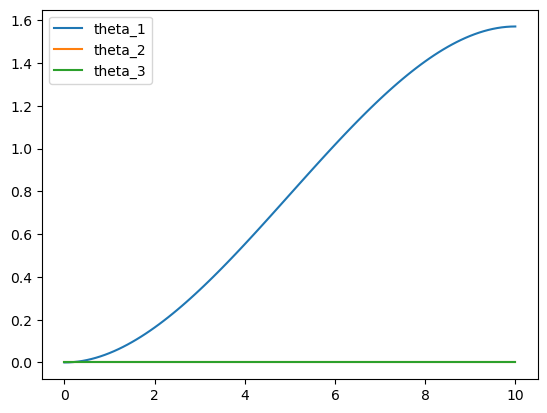

In [3]:
# Simpler version
# Assume we get these data from inverse kinematics

t1 = [0, pi/2]
t2 = [0, 0]
t3 = [0, 0]
angle_lst = [t1, t2, t3]

tf = 10
t_lst = np.arange(0, tf + 0.1, 0.1)


for i in range(len(angle_lst)):
    
    a0 = angle_lst[i][0]
    a1 = 0
    a2 = 3/tf**2 * (angle_lst[i][-1] - angle_lst[i][0])
    a3 = -2/tf**3 * (angle_lst[i][-1] - angle_lst[i][0])
    
    t = symbols('t')
    print(f'Displacement Equations for theta_{i+1}')
    eqn = a0 + a1 * t + a2 * t**2 + a3 * t**3
    disp = [eqn.subs(t, i) for i in t_lst]
    plt.plot(t_lst, disp, label = f'theta_{i+1}')
    plt.legend()
    display(eqn)


Displacement equations for theta_1


-0.001*pi*t**3 + 0.015*pi*t**2

Velocity equations for theta_1


-0.003*pi*t**2 + 0.03*pi*t

Acceleration equations for theta_1


-0.006*pi*t + 0.03*pi

---------------------------------
Displacement equations for theta_2


0

Velocity equations for theta_2


0

Acceleration equations for theta_2


0

---------------------------------
Displacement equations for theta_3


0

Velocity equations for theta_3


0

Acceleration equations for theta_3


0

---------------------------------


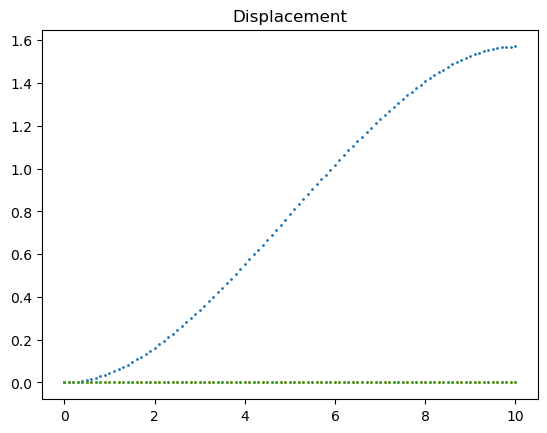

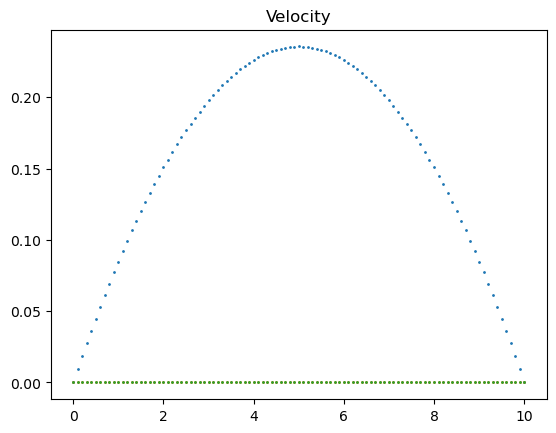

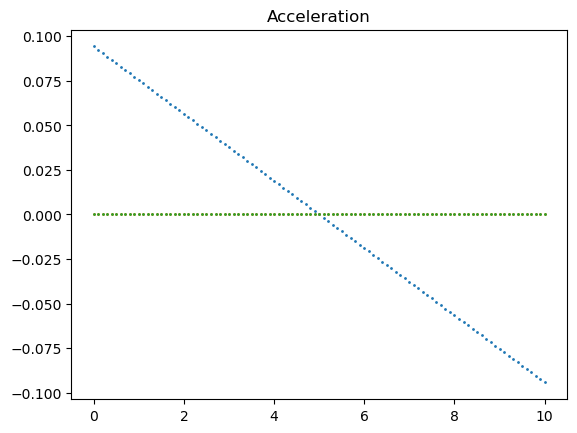

In [4]:
# More comprehensive version

# Initial and final condition
t1 = [0, pi/2]
t2 = [0, 0]
t3 = [0, 0]
angle_lst = [t1, t2, t3]

# Total motion time
tf = 10
t_lst = np.arange(0, tf + 0.1, 0.1)

# Record for all joints
disp_all = []
vel_all = []
acc_all = []

for i in range(len(angle_lst)):
    
    a0 = angle_lst[i][0]
    a1 = 0
    a2 = 3/tf**2 * (angle_lst[i][-1] - angle_lst[i][0])
    a3 = -2/tf**3 * (angle_lst[i][-1] - angle_lst[i][0])
    
    t = symbols('t')
    print(f'Displacement equations for theta_{i+1}')
    eqn_disp = a0 + a1 * t + a2 * t**2 + a3 * t**3
    
    display(eqn_disp)
    
    disp = [eqn_disp.subs(t, i) for i in t_lst]
    
    disp_list = [float(i) for i in disp]
    
    
    print(f'Velocity equations for theta_{i+1}')
    eqn_vel = a1 + 2 * a2 * t + 3 * a3 * t**2
    
    vel = [eqn_vel.subs(t, i) for i in t_lst]
    display(eqn_vel)
    
    vel_list = [float(i) for i in vel]
    
    print(f'Acceleration equations for theta_{i+1}')
    eqn_acc = 2 * a2 + 6 * a3 * t
    
    acc = [eqn_acc.subs(t, i) for i in t_lst]
    display(eqn_acc)
    
    acc_list = [float(i) for i in acc]
    
    print('---------------------------------')
    disp_all.append(disp_list)
    vel_all.append(vel_list)
    acc_all.append(acc_list)
    
    
for i in range(len(disp_all)):
    plt.scatter(t_lst, disp_all[i], label = f'theta_{i+1}', s=1)
    plt.title('Displacement')
plt.show()

for i in range(len(disp_all)):
    plt.scatter(t_lst, vel_all[i], label = f'theta_{i+1}', s=1)
    plt.title('Velocity')
plt.show()

for i in range(len(disp_all)):
    plt.scatter(t_lst, acc_all[i], label = f'theta_{i+1}', s=1)
    plt.title('Acceleration')
plt.show()
    
    
    

### Tut 6.3.2 (Parabolic)

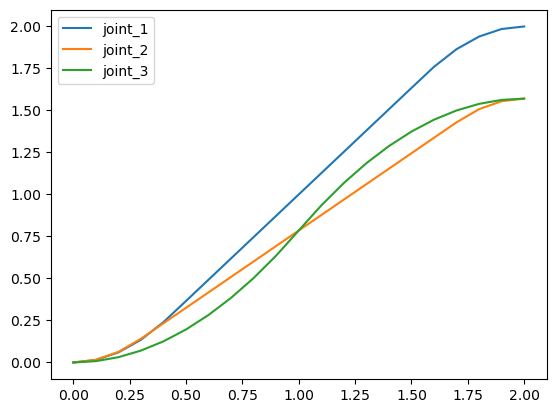

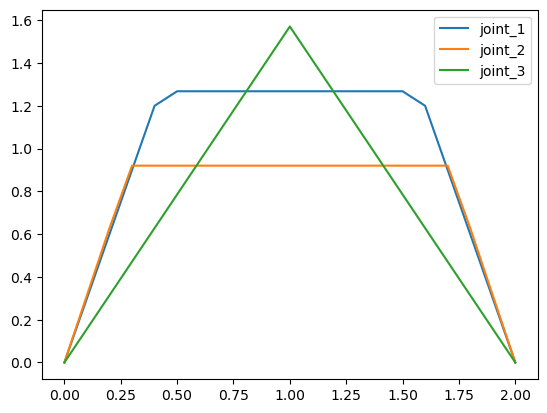

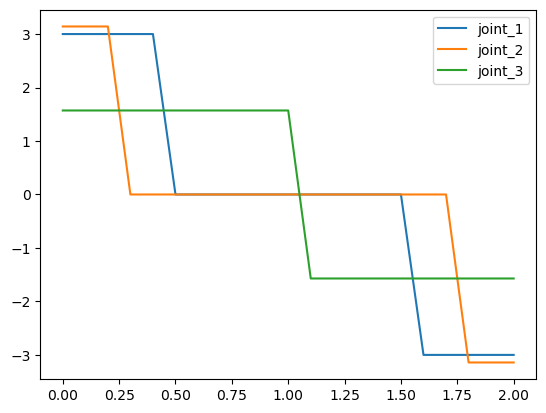

In [5]:
# Parabolic blend trajectory planning

# Provided information

d1 = [0, 2]
t2 = [0, np.pi/2]
t3 = [0, np.pi/2]

disp_lst = [d1, t2, t3]

a_d1 = 3
a_t2 = np.pi
a_t3 = np.pi/2

acc_lst = [a_d1, a_t2, a_t3]

# Total motion time is 2s
tf = 2
th = tf/2

# Time step
dt = 0.1
time = np.arange(0, tf + dt, dt)

# Record for all joints
disp_all = []
vel_all = []
acc_all = []

for i in range(len(disp_lst)):
    
    # Get acceleration
    a = acc_lst[i]
    
    # Get displacement, initial and final
    disp_0, disp_f = disp_lst[i]
    
    # Equation 24 (calculate blend time tb)
    tb = th - np.sqrt(a**2 * th**2 - a * (disp_f - disp_0)) / a
    
    # Calculate V
    V = a * tb
    
    # Empty lists for displacement, velocity and acceleration 
    disp, vel, acc = [], [], []
    
    for t in time:
        
        # Apply Equation 27
        
        if 0 <= t <= tb:
            res_disp = disp_0 + V/(2*tb) * t**2
            
            res_vel = V/tb * t 
            
            res_acc = V/tb
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
            
        elif tb < t <= (tf - tb):
            res_disp = (disp_f + disp_0 - V * tf)/2 + V * t
            
            res_vel = V
            
            res_acc = 0
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
            
        else:
            res_disp = disp_f - a * tf**2/2 + a * tf * t - a/2 * t**2
            
            res_vel = a * tf - a * t
            
            res_acc = -a
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
        
    disp_all.append(disp)
    vel_all.append(vel)
    acc_all.append(acc)

for i in range(len(disp_all)):
    plt.plot(time, disp_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
    
for i in range(len(disp_all)):
    plt.plot(time, vel_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
    
for i in range(len(disp_all)):
    plt.plot(time, acc_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
 

### Tut 6.3.3

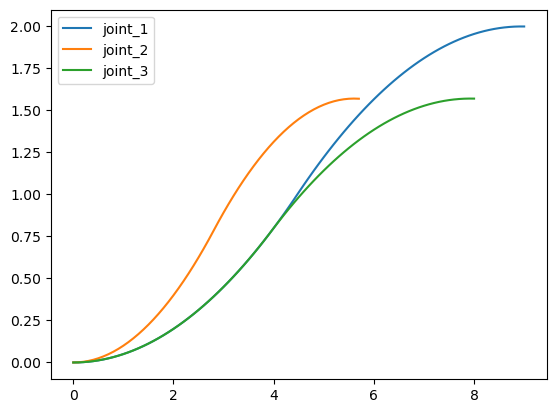

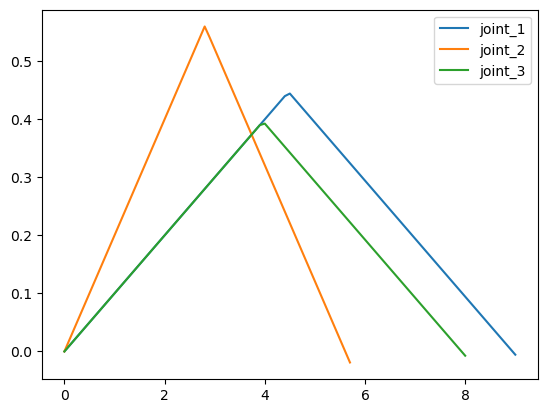

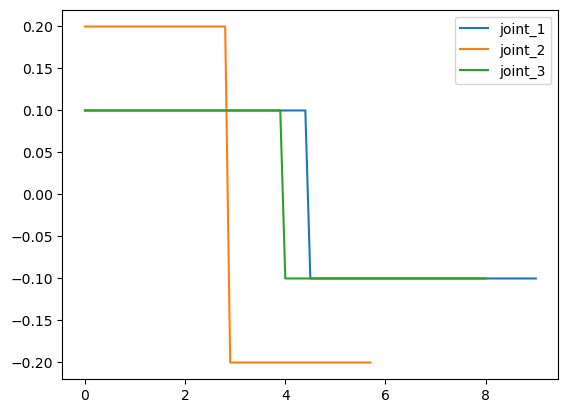

In [6]:
# From inverse kinematics

d2 = [0, 2]
t1 = [0, np.pi/2]
d3 = [0, 3]

disp_lst = [d1, t2, t3]

a_d2 = 0.1
a_t1 = 0.2
a_d3 = 0.1

acc_lst = [a_d2, a_t1, a_d3]

# Record for all joints
time_all = [] # NOTE! The time taken for each joint's motion might be different!
disp_all = []
vel_all = []
acc_all = []

for i in range(len(disp_lst)):
    
    # Get displacement, initial and final
    disp_0, disp_f = disp_lst[i]
    
    # Get acceleration
    a = acc_lst[i]
    
    # Total motion time is unspecified
    
    # Minimum time is calculated
    ts = np.sqrt((disp_f - disp_0)/a)
    
    # Total time
    tf = ts * 2
    
    # Time step
    dt = 0.1
    time = np.arange(0, tf + dt, dt)
    
    # Switching time = blend time
    tb = ts
    
    # Calculate V
    V = a * tb
    
    # Empty lists for displacement, velocity and acceleration 
    disp, vel, acc = [], [], []
    
    for t in time:
        
        # Apply Equation 27
        
        if 0 <= t <= tb:
            res_disp = disp_0 + V/(2*tb) * t**2
            
            res_vel = V/tb * t 
            
            res_acc = V/tb
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
            
        elif tb < t <= (tf - tb):
            res_disp = (disp_f + disp_0 - V * tf)/2 + V * t
            
            res_vel = V
            
            res_acc = 0
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
            
        else:
            res_disp = disp_f - a * tf**2/2 + a * tf * t - a/2 * t**2
            
            res_vel = a * tf - a * t
            
            res_acc = -a
            
            disp.append(res_disp)
            vel.append(res_vel)
            acc.append(res_acc)
    
    time_all.append(time)
    disp_all.append(disp)
    vel_all.append(vel)
    acc_all.append(acc)

for i in range(len(disp_all)):
    plt.plot(time_all[i], disp_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
    
for i in range(len(disp_all)):
    plt.plot(time_all[i], vel_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
    
for i in range(len(disp_all)):
    plt.plot(time_all[i], acc_all[i], label = f'joint_{i+1}')
    plt.legend()
plt.show()
 
